In [6]:
from IPython.display import clear_output
import rebound
import matplotlib.pyplot as plt
import numpy as np

In [7]:
sim = rebound.Simulation()
sim.units = ('AU', 'yr', 'Msun')
sim.add("Sun")
sim.add("Jupiter")

sim.integrator = "whfast"
sim.dt = .01

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')


In [8]:
as_per_ring = 30
rings = 15

for j in range (rings):
    for i in range (as_per_ring):
        mass=1e-29
        radius=2+0.1*j
        omega=(2*np.pi)/as_per_ring*i
        sim.add(m=mass,a=radius,omega=omega)

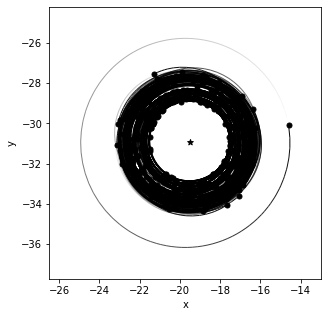

In [13]:
fig = rebound.OrbitPlot(sim)

In [9]:
sim.status()

---------------------------------
REBOUND version:     	3.19.1
REBOUND built on:    	Jan 14 2022 11:24:53
Number of particles: 	452
Selected integrator: 	whfast
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.010000
---------------------------------
<rebound.particle.Particle object at 0x7f71c5140740, m=0.9999999999950272 x=-0.00864090016224989 y=0.003190810895892342 z=0.00017573382357581043 vx=-0.0011529755050315575 vy=-0.003098038370161208 vz=5.172559131474425e-05>
<rebound.particle.Particle object at 0x7f7189ec79c0, m=0.0009547919099366768 x=4.696009602201199 y=-1.653988553844416 z=-0.098199473508047 vx=0.8826212061801825 vy=2.7289789478203783 vz=-0.03106836329172608>
<rebound.particle.Particle object at 0x7f71c5140740, m=1e-29 x=1.9958467772783939 y=0.0016100587344917542 z=8.18955674845256e-05 vx=-0.0003099599705556847 vy=4.444427535458739 vz=2.204072508268487e-05>
<rebound.particle.Particle object at 0x7f7189ec79c0, m=1e-29 x=1.9521419787460053 y=0.41743344037

In [11]:
years = 10000
time = years
sim.exit_max_distance = 50.
for i in range (years):

    clear_output(wait=True)
    print(i)
    try:
        sim.integrate(i*2.*np.pi)  
    except rebound.Escape as error:
        print(error)
        for j in range(sim.N):
            p = sim.particles[j]
            d2 = p.x*p.x + p.y*p.y + p.z*p.z
            if d2>sim.exit_max_distance**2:
                index=j # cache index rather than remove here since our loop would go beyond end of particles array
        sim.remove(index=index)

    

9999


In [12]:
sim.save("snapshot.bin")

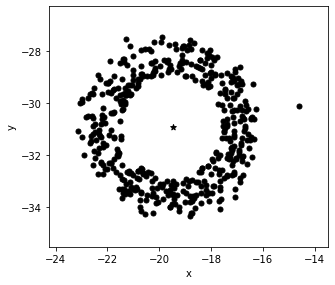

In [14]:
fig, ax = rebound.OrbitPlot(sim, orbit_type=None)